In [36]:
import numpy as np

In [24]:
#using Pillow(PIL)
from PIL import Image

#Load an image from a file
img_pil = Image.open('R.jpg')
print(f"PIL Image Format: {img_pil.format} , size: {img_pil.size} , mode: {img_pil.mode}")


PIL Image Format: JPEG , size: (1920, 1276) , mode: RGB


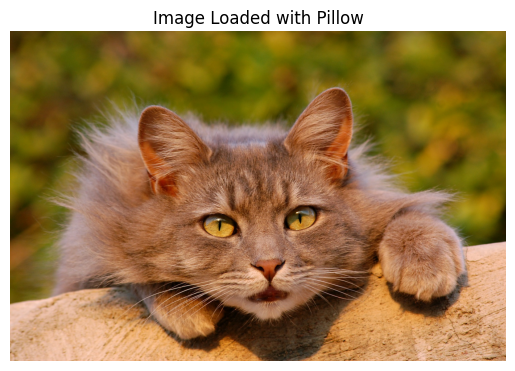

In [25]:
import matplotlib.pyplot as plt
# using Matplotlib to display the RBG converted image
plt.imshow(img_pil)
plt.title("Image Loaded with Pillow")
plt.axis('off')  # Hide axis for cleaner display
plt.show()


PIL Image Format : JPEG, size : (1920, 1276), mode : RGB


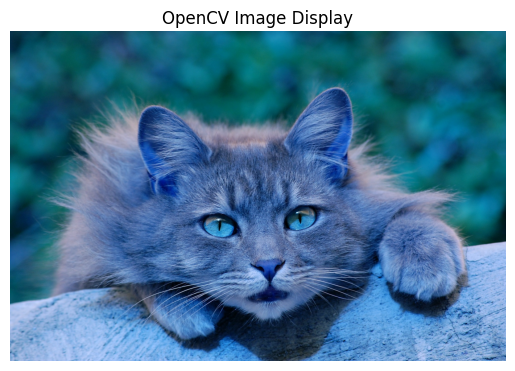

In [26]:
import cv2
img_cv = cv2.imread('R.jpg')
print(f"PIL Image Format : {img_pil.format}, size : {img_pil.size}, mode : {img_pil.mode}")
# Display the image using matplotlib
plt.imshow(img_cv)
plt.title('OpenCV Image Display')
plt.axis('off')  # Hide axes
plt.show()

In [27]:
# Convert from BGR (OpenCV default) to RGB for correct color display
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
img_gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)


## Answers to Digital Image Practice

### 1. Load and View a Grayscale Image

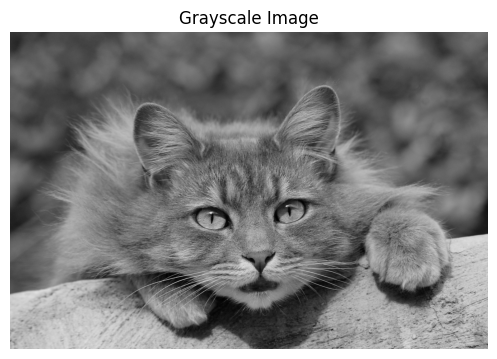

In [28]:
# Plot both images
plt.figure(figsize=(10, 4))
# Grayscale Image
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()


### 1.2 Raw Pixel:

In [29]:
print(img_gray[:5, :5])    


[[58 57 58 57 54]
 [54 53 55 55 53]
 [56 55 56 55 54]
 [57 55 53 51 49]
 [55 53 53 52 50]]


### 1.3 Inspect Shape, Data Type, and Pixel Range

In [30]:
print("Shape:", img_gray.shape)      
print("Data type:", img_gray.dtype)
print("Pixel range:", img_gray.min(), "to", img_gray.max())


Shape: (1276, 1920)
Data type: uint8
Pixel range: 0 to 253


### 2. Brighten the Image


In [31]:
# Convert the image to grayscale
img_gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

(np.float64(-0.5), np.float64(1919.5), np.float64(1275.5), np.float64(-0.5))

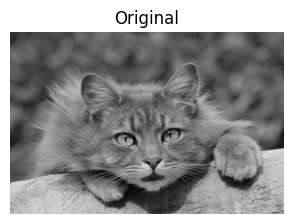

In [32]:
bright_naive = img_gray + 50
bright_clipped = cv2.add(img_gray, 50)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")
plt.axis('off')

### 3.Adding higher value:

***With clipping anything above 255 returns as out of bounds***

In [34]:
too_bright = img_gray + 300  # Overflow problem
plt.imshow(too_bright, cmap='gray')
plt.title("Brightened (+300) - Overflow")
plt.show()

# Fixed using clip
clipped_bright = np.clip(img + 300, 0, 255).astype(np.uint8)
plt.imshow(clipped_bright, cmap='gray')
plt.title("Brightened (+300) - Clipped")
plt.show()


OverflowError: Python integer 300 out of bounds for uint8

### 4. Subtract to Darken

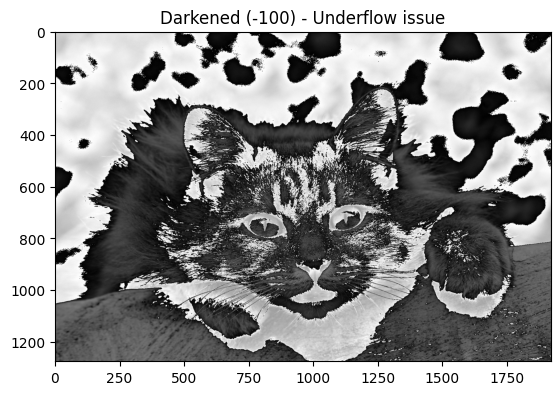

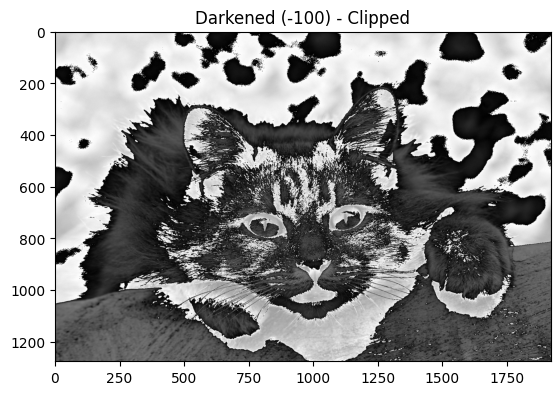

In [38]:
darker_img = img_gray - 100
plt.imshow(darker_img, cmap='gray')
plt.title("Darkened (-100) - Underflow issue")
plt.show()

# Fixed
clipped_dark = np.clip(img_gray - 100, 0, 255).astype(np.uint8)
plt.imshow(clipped_dark, cmap='gray')
plt.title("Darkened (-100) - Clipped")
plt.show()


### 5.Transpose the Image

***The image is mirrored along the main diagonal. Looks like a rotation and flip combined***

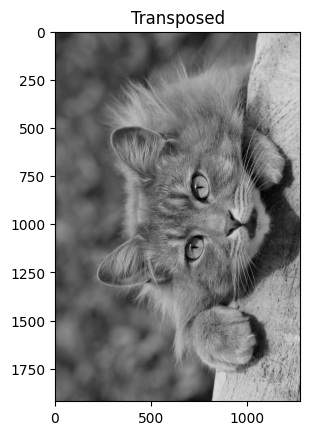

In [40]:
transposed_img = img_gray.T
plt.imshow(transposed_img, cmap='gray')
plt.title("Transposed")
plt.show()


### 6.Flip Horizontally & Vertically

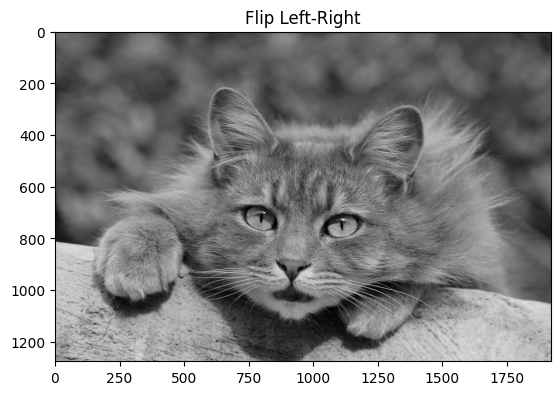

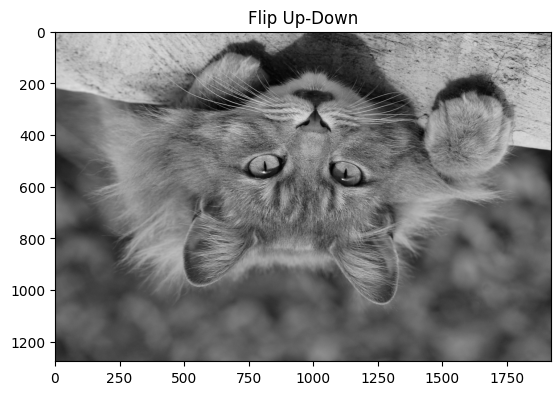

In [41]:
flip_lr = np.fliplr(img_gray)
flip_ud = np.flipud(img_gray)

plt.imshow(flip_lr, cmap='gray'); plt.title("Flip Left-Right"); plt.show()
plt.imshow(flip_ud, cmap='gray'); plt.title("Flip Up-Down"); plt.show()


### 7. crop a section

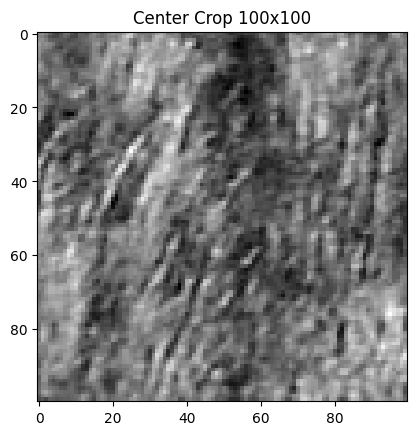

In [43]:
h, w = img_gray.shape
start_x, start_y = w//2 - 50, h//2 - 50
cropped_center = img_gray[start_y:start_y+100, start_x:start_x+100]
plt.imshow(cropped_center, cmap='gray')
plt.title("Center Crop 100x100")
plt.show()


### 8. Negative Image

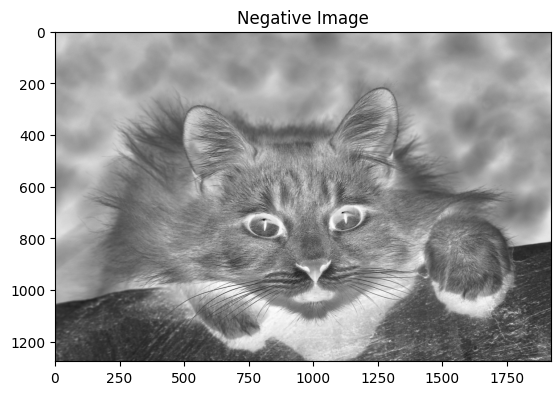

In [44]:
negative_img = 255 - img_gray
plt.imshow(negative_img, cmap='gray')
plt.title("Negative Image")
plt.show()


### 9. rotate the image

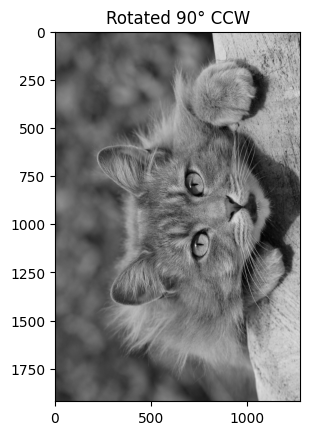

In [45]:
rot90_img = np.rot90(img_gray, k=1)   # 90° CCW
rot90_img2 = np.rot90(img_gray, k=-1) # 90° CW
rot180_img = np.rot90(img_gray, k=2)  # 180°

plt.imshow(rot90_img, cmap='gray'); plt.title("Rotated 90° CCW"); plt.show()


### 10. Combine Multiple Transformations

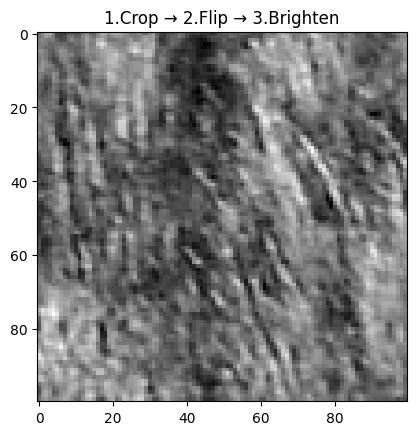

In [47]:
# Crop
crop = img_gray[start_y:start_y+100, start_x:start_x+100]

# Flip horizontally
flipped_crop = np.fliplr(crop)

# Brighten
bright_final = np.clip(flipped_crop + 50, 0, 255).astype(np.uint8)

plt.imshow(bright_final, cmap='gray')
plt.title("1.Crop → 2.Flip → 3.Brighten")
plt.show()


### Bonus Challenge: Create a Collage

In [49]:
downsampled = img_gray[::2, ::2]  # this will take every other pixel

collage = np.hstack([
    img_gray, 
    255 - img_gray, 
    np.fliplr(img_gray), 
    downsampled
])

plt.imshow(collage, cmap='gray')
plt.title("Collage")
plt.show()


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1276 and the array at index 3 has size 638